In [25]:
#Import all Necessary imports 
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
import scipy
from matplotlib import pyplot as plt

from sklearn.datasets import make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import random
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
from sklearn.metrics import accuracy_score
from sklearn import tree
import scipy.stats as stat


%matplotlib inline 


In [6]:
#Let us see the data

data_result=pd.read_csv('../data/AdSmartABdata.csv')
data_result.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


Method to Split the data according to browser and platform

In [7]:
def split_data(df):
    try:
       
        v_browser=df[df.columns[~df.columns.isin(['platform_os'])]]
        v_platform=df[df.columns[~df.columns.isin(['browser'])]]
        
        return v_browser, v_platform
    except KeyError as e:
        print("key columns is missing")
        return df 
v_browser,v_platform = split_data(data_result)
v_browser

,auction_id,experiment,date,hour,device_make,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,Samsung Internet,0,0


Let us eliminate those that did not participate 

In [8]:
def drop_col_noresponse(df):
    impression_data = df.query("not (yes == 0 & no == 0)")
    return impression_data


In [110]:
drop_col_noresponse(data_result)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1
...,...,...,...,...,...,...,...,...,...
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,0
8063,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1,0
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,1
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1


In [9]:

impression_data = drop_col_noresponse(data_result)
impression_data['target'] = impression_data['yes'].map(lambda x: x==1)
impression_data = impression_data.drop(columns = ['yes', 'no', 'auction_id'], axis=1)

/Users/rssebudandi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
impression_data

,experiment,date,hour,device_make,platform_os,browser,target
2,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,False
16,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,True
20,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,False
23,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,True
27,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,False
...,...,...,...,...,...,...,...
8059,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,True
8063,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,True
8064,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,False
8069,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,False


In [11]:
v_browser,v_platform = split_data(impression_data)

In [12]:
v_browser

,experiment,date,hour,device_make,browser,target
2,exposed,2020-07-05,2,E5823,Chrome Mobile WebView,False
16,exposed,2020-07-04,16,Generic Smartphone,Chrome Mobile,True
20,exposed,2020-07-06,8,Generic Smartphone,Chrome Mobile,False
23,control,2020-07-08,4,Samsung SM-A202F,Facebook,True
27,control,2020-07-03,15,Generic Smartphone,Chrome Mobile,False
...,...,...,...,...,...,...
8059,exposed,2020-07-05,21,Generic Smartphone,Chrome Mobile,True
8063,exposed,2020-07-04,1,Generic Smartphone,Chrome Mobile,True
8064,control,2020-07-09,7,Generic Smartphone,Chrome Mobile,False
8069,control,2020-07-10,16,Generic Smartphone,Chrome Mobile,False


Let us encode out data

In [32]:
def encode_labels_browser(df):
    date_encoder = preprocessing.LabelEncoder()
    device_encoder = preprocessing.LabelEncoder()
    browser_encoder = preprocessing.LabelEncoder()
    experiment_encoder = preprocessing.LabelEncoder()
    target_encoder = preprocessing.LabelEncoder()
    
    df['date'] = date_encoder.fit_transform(df['date'])
    df['device_make'] = device_encoder.fit_transform(df['device_make'])
    df['browser'] = browser_encoder.fit_transform(df['browser'])
    df['experiment'] = experiment_encoder.fit_transform(df['experiment'])
    df['target'] = target_encoder.fit_transform(df['target'])
    
    return df, date_encoder, device_encoder, browser_encoder, experiment_encoder, target_encoder
browser_encode=encode_labels_browser(v_browser)
browser_encode

/Users/rssebudandi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/rssebudandi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/rssebudandi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

(      experiment  date  hour  device_make  browser  target
 2              1     2     2            4        2       0
 16             1     1    16           13        1       1
 20             1     3     8           13        1       0
 23             0     5     4           43        4       1
 27             0     0    15           13        1       0
 ...          ...   ...   ...          ...      ...     ...
 8059           1     2    21           13        1       1
 8063           1     1     1           13        1       1
 8064           0     6     7           13        1       0
 8069           0     7    16           13        1       0
 8071           1     0     4           13        1       0
 
 [1243 rows x 6 columns],
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder())

In [15]:
#create feature and target column
encoded_df, date_encoder, device_encoder, browser_encoder, experiment_encoder, target_encoder = encode_labels_browser(v_browser)
feature_col =["experiment", "hour", "date", "device_make","browser"]
features_X =encoded_df[feature_col]
target_y =encoded_df["target"]

/Users/rssebudandi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/rssebudandi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/rssebudandi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [16]:
#View target 
target_y

2       0
16      1
20      0
23      1
27      0
       ..
8059    1
8063    1
8064    0
8069    0
8071    0
Name: target, Length: 1243, dtype: int64

In [17]:
#view features 
features_X

,experiment,hour,date,device_make,browser
2,1,2,2,4,2
16,1,16,1,13,1
20,1,8,3,13,1
23,0,4,5,43,4
27,0,15,0,13,1
...,...,...,...,...,...
8059,1,21,2,13,1
8063,1,1,1,13,1
8064,0,7,6,13,1
8069,0,16,7,13,1


In [18]:
#fuction to split the data 
def train_test_val_split(X, Y, split=(0.2, 0.1), shuffle=True):
    """Split dataset into train/val/test subsets by 70:20:10(default).
    
    Args:
      X: List of data.
      Y: List of labels corresponding to data.
      split: Tuple of split ratio in `test:val` order.
      shuffle: Bool of shuffle or not.
      
    Returns:
      Three dataset in `train:test:val` order.
    """
    from sklearn.model_selection import train_test_split
    assert len(X) == len(Y), 'The length of X and Y must be consistent.'
    X_train, X_test_val, y_train, Y_test_val = train_test_split(X, Y, 
        test_size=(split[0]+split[1]), shuffle=shuffle)
    X_test, X_val, y_test, y_val = train_test_split(X_test_val, Y_test_val, 
        test_size=split[1], shuffle=False)
    return (X_train, y_train), (X_test, y_test), (X_val, y_val)

In [19]:
#Let us split the data accordingly 

(X_train, y_train), (X_test, y_test), (X_val, y_val)=train_test_val_split(features_X, target_y)

# Logistic Modeling

In [49]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset


# create model
model = LogisticRegression()
#fit model
model.fit(X_train, y_train)


LogisticRegression()

In [50]:
#predict
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [51]:
# evaluate model
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.529 (0.027)


In [41]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 55.22%


In [39]:
print (scores)

[0.55172414 0.48275862 0.55747126 0.53448276 0.51724138]


In [37]:
#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[161,  24],
       [130,  20]])

Text(0.5, 15.0, 'Predicted')

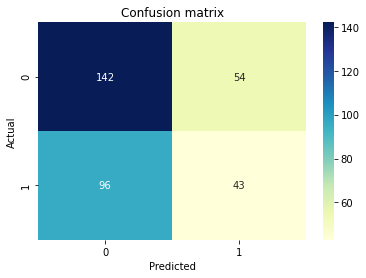

In [105]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')


In [44]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.529119 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.524521 (0.034417) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.524521 (0.034417) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.524138 (0.034559) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.524138 (0.034559) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.524138 (0.034559) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.524521 (0.034417) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.524521 (0.034417) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.524138 (0.034303) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.526820 (0.031976) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.528352 (0.030336) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.528352 (0.030336) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.523755 (0.032468) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.529119 (0.033771) wi

/Users/rssebudandi/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

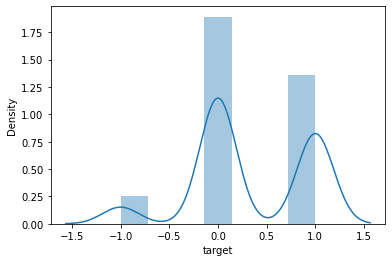

In [52]:
#checking difference between labled y and predicted y
sns.distplot(y_test-y_pred)

# Using Decission Tree

In [54]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

In [55]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [56]:
#Predict the response for test dataset
y_predtress = clf.predict(X_test)

In [57]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predtress))

Accuracy: 0.5552238805970149


In [58]:
# evaluate model
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.498 (0.030)


In [60]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_predtress)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 55.52%


In [118]:
scores

array([0.5       , 0.46551724, 0.48850575, 0.53448276, 0.58045977])

/Users/rssebudandi/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

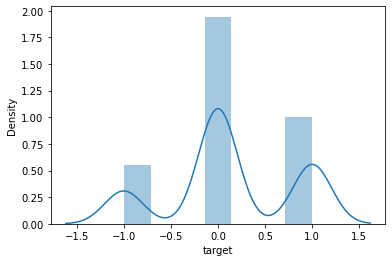

In [61]:
#checking difference between labled y and predicted y
sns.distplot(y_test-y_predtress)

In [65]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [66]:
from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(clf,param_grid=parameters,scoring='neg_mean_squared_error',cv=5,verbose=3)

In [67]:
# function for calculating how much time take for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        #print(thour,":",tmin,':',round(tsec,2))

In [ ]:
%%capture
from datetime import datetime

start_time=timer(None)

tuning_model.fit(X_train,y_train)

timer(start_time)

In [ ]:
# best hyperparameters 
tuning_model.best_params_

In [ ]:
# best model score
tuning_model.best_score_

# XGBoost

In [20]:
from xgboost import XGBClassifier
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

In [62]:
# make predictions for test data
y_predxb = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [22]:
predictions

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,


In [64]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_predxb)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 54.03%


/Users/rssebudandi/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

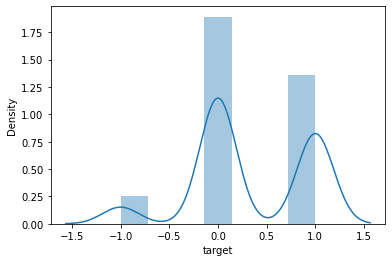

In [63]:
#checking difference between labled y and predicted y
sns.distplot(y_test-y_predxb)